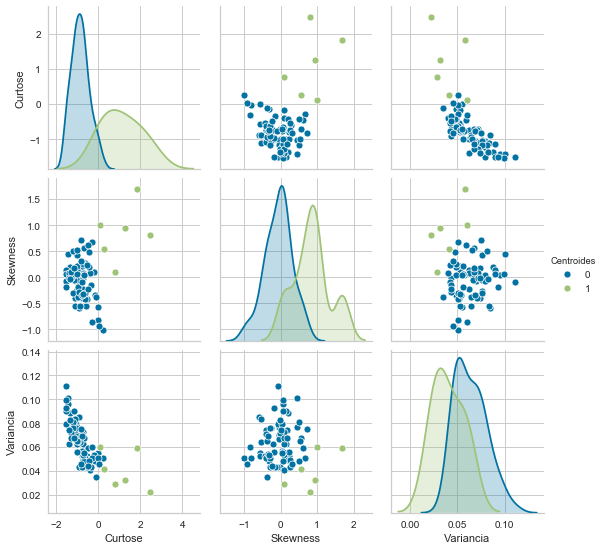

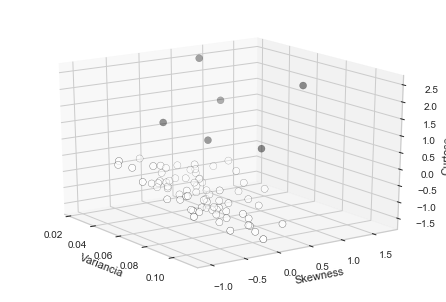

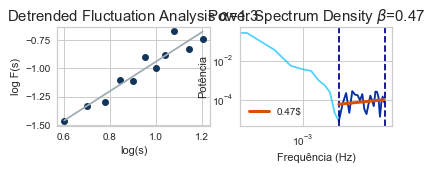

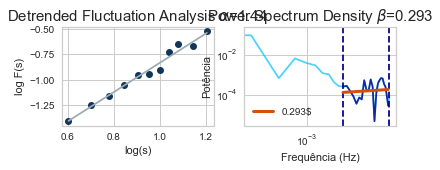

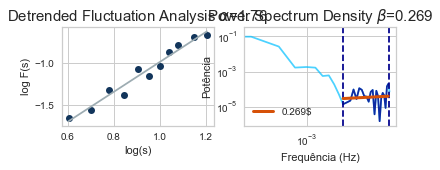

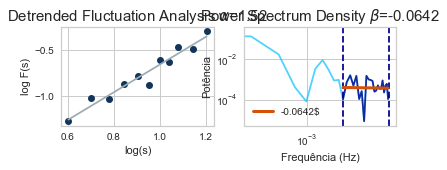

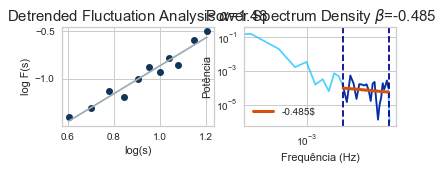

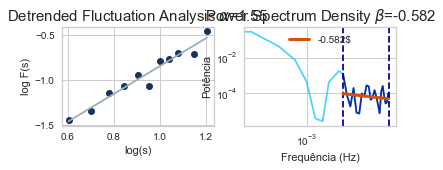

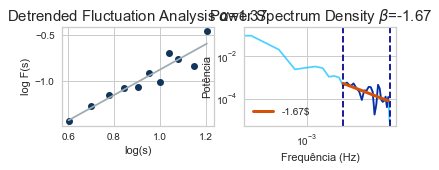

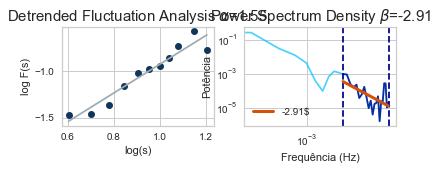

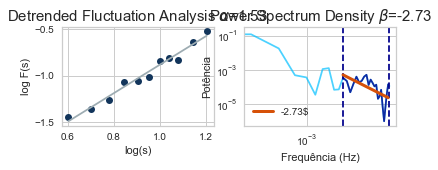

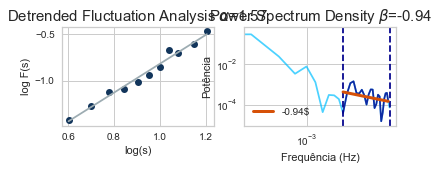

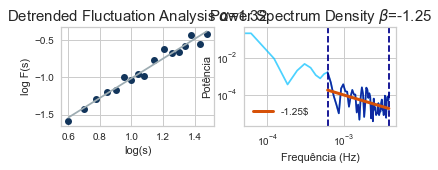

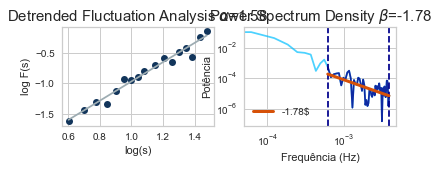

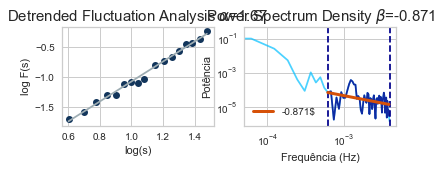

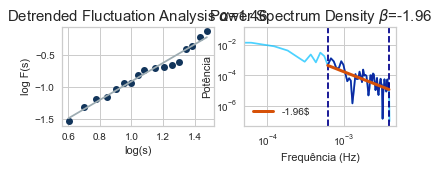

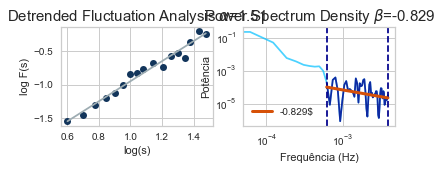

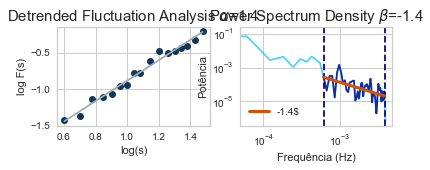

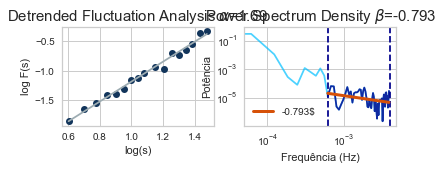

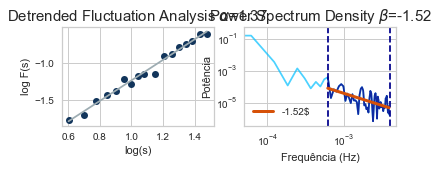

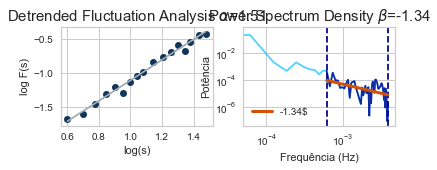

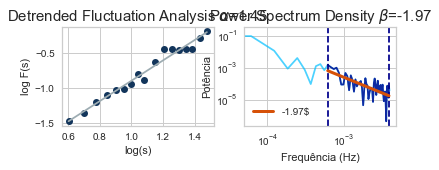

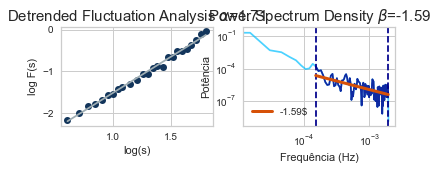

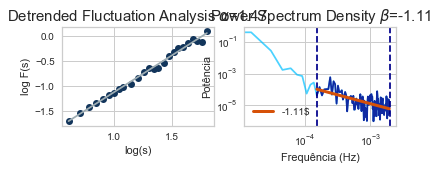

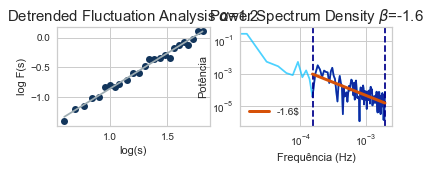

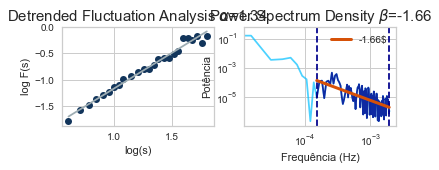

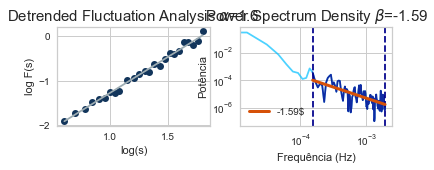

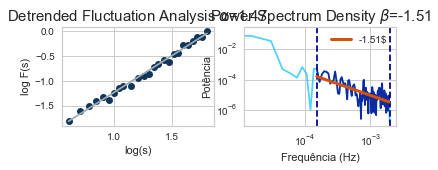

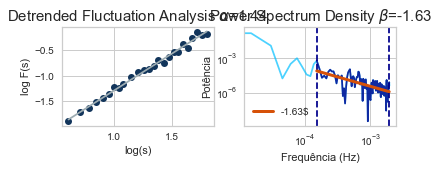

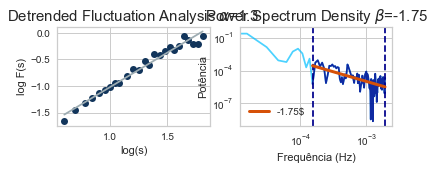

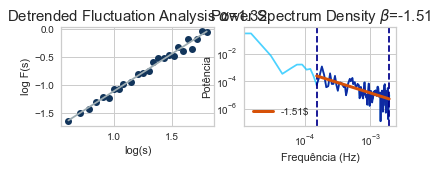

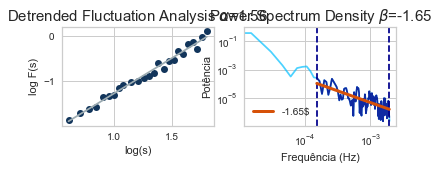

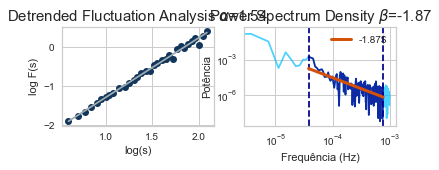

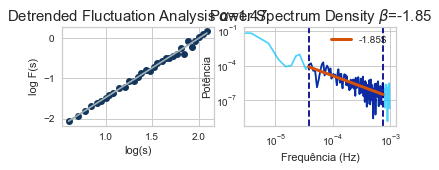

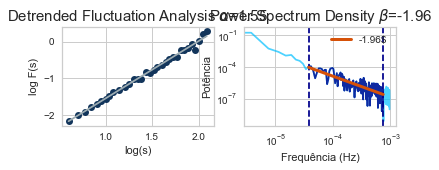

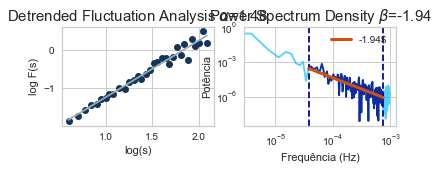

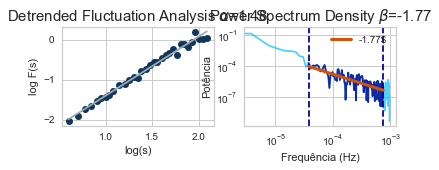

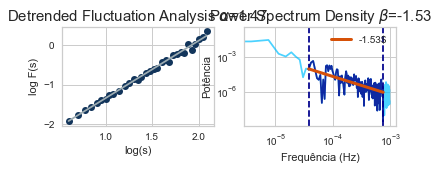

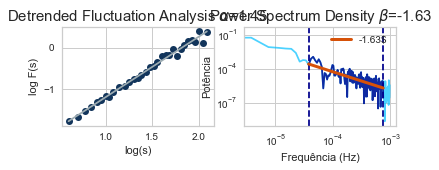

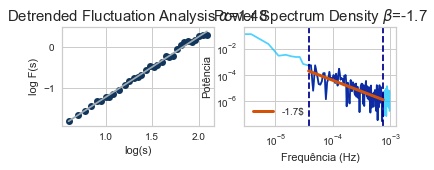

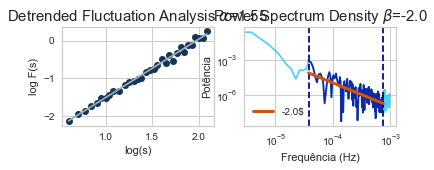

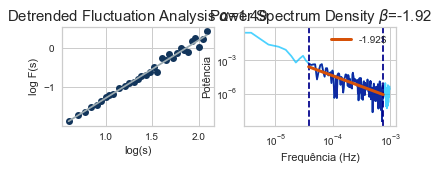

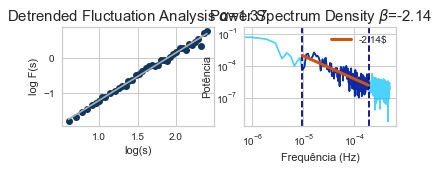

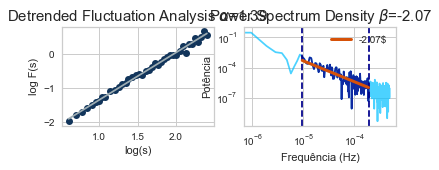

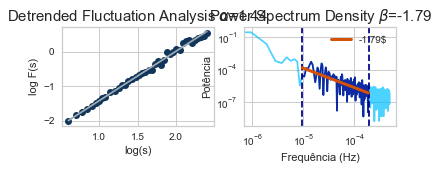

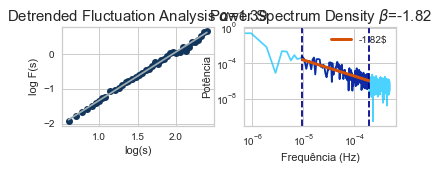

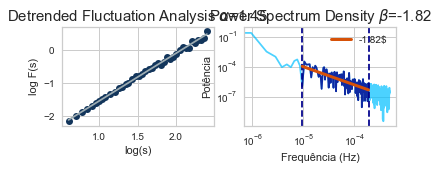

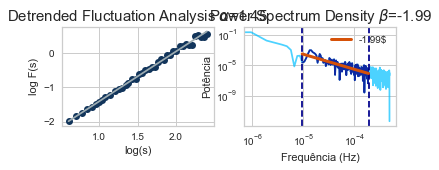

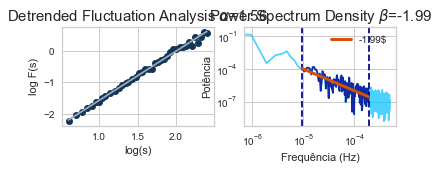

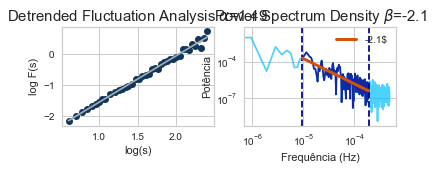

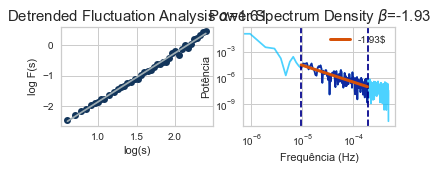

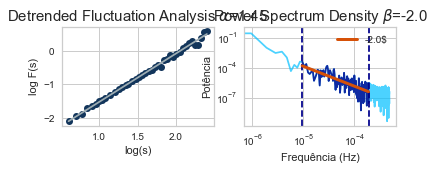

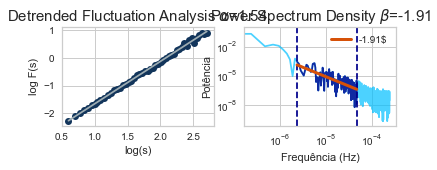

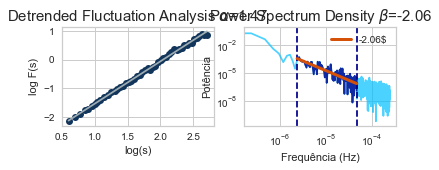

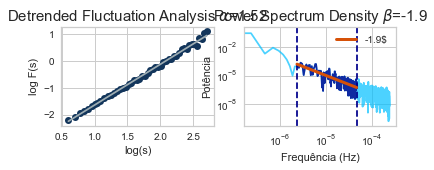

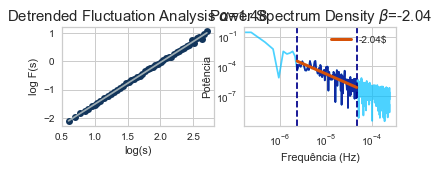

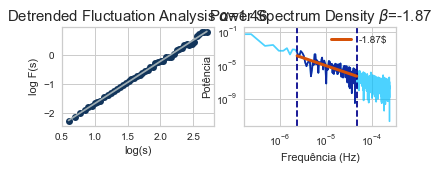

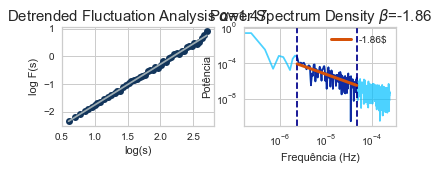

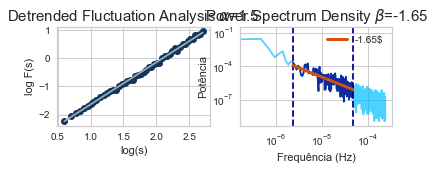

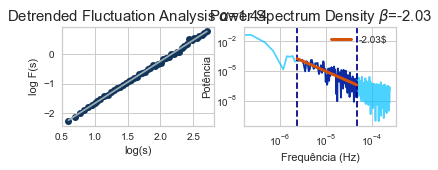

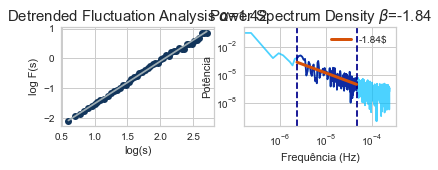

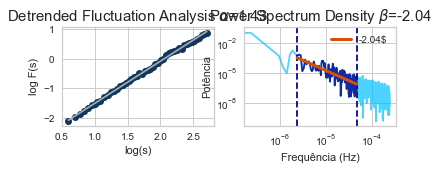

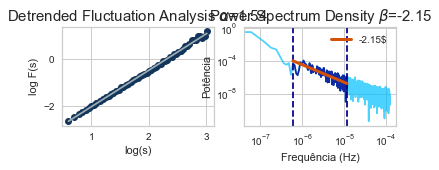

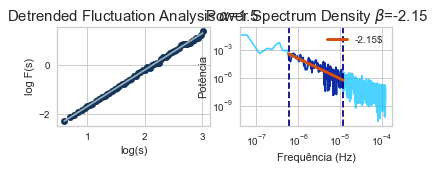

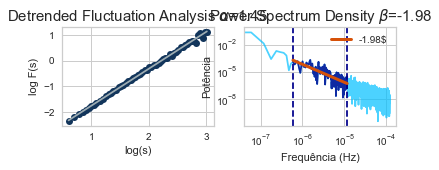

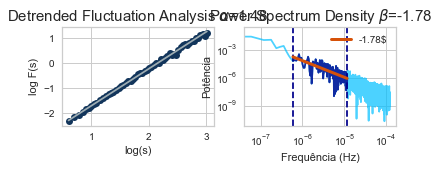

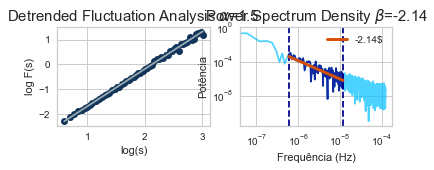

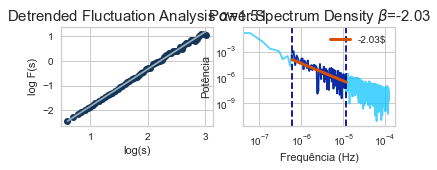

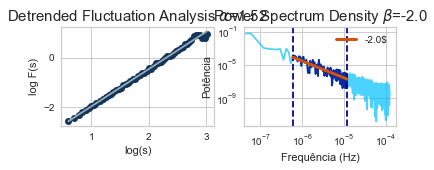

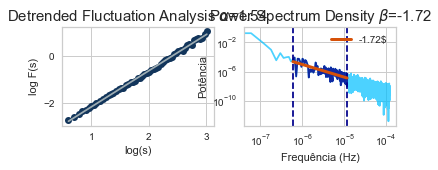

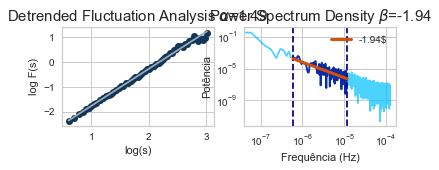

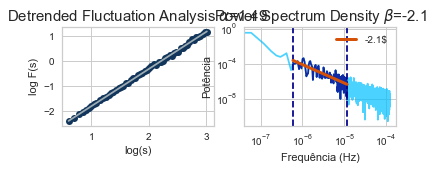

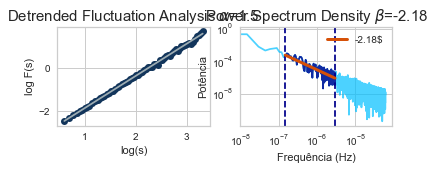

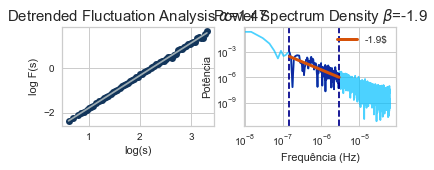

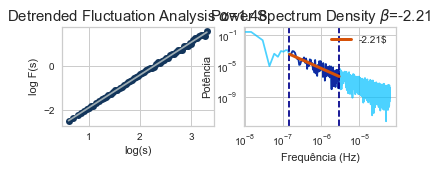

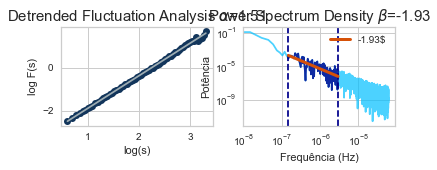

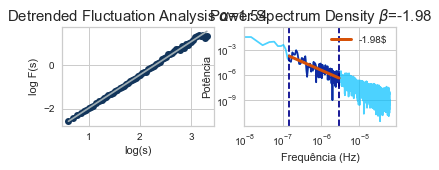

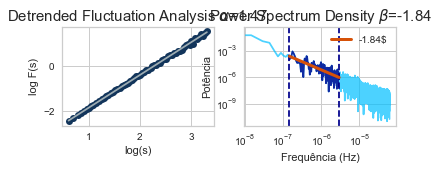

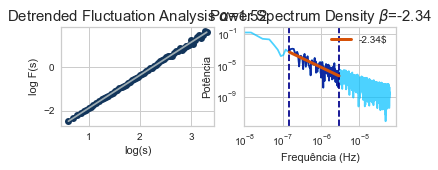

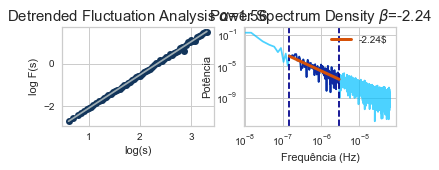

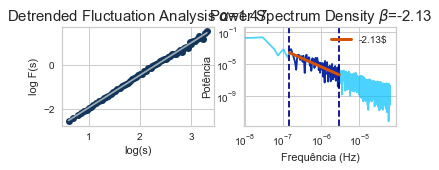

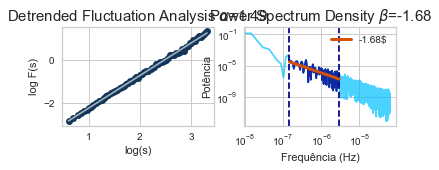

In [27]:
'''
1-Simulação de Sinais Estocásticos com GRNG1.py com N valores de medidas.
    1.1. Utilize o algoritmo e gere 10 sinais para cada família com N elementos:
        N1: 64; N2:128; N3:256; N4:512; N5:1024; N6: 2048; N7:4096; N8: 8192
'''

import numpy as np
import pandas as pd
from numpy import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.stats
import seaborn as sb
import statsfuncs
import mfdfa

%matplotlib inline


def obterSinaisEstocasticos():
    n = 64
    res = n / 12
    i = 0
    j = 0
    df = []
    norm = []

    #Função para normalizar a serie entre 0 e 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    for i in range(8):
        for j in range(10):
            df.append(pd.DataFrame((np.random.randn(n) * sqrt(res) * sqrt(1 / 64.)).cumsum(), columns=['Serie ' + str(j + 1)]))

            #Normaliza os dados gerados randomincamente
            scaled_data = scaler.fit_transform(df[j])
            norm.append(pd.DataFrame((scaled_data.tolist()),columns=['Serie ' + str(j + 1)]))

        #Concatena as series da familia gerada randomicamente, como também as normalizadas
        a = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7], df[8], df[9]], axis=1, join='inner')
        normalized = pd.concat([norm[0], norm[1], norm[2], norm[3], norm[4], norm[5], norm[6], norm[7], norm[8], norm[9]], axis=1, join='inner')

        # Armazena as series concatenadas em arquivo .csv
        a.to_csv('Arquivos/familia' + str(i + 1) + '.csv', index=False, header=True)
        normalized.to_csv('Arquivos/Series Normalizadas/familia' + str(i + 1) + '_normalizada.csv', index=False, header=True)
        j = 0
        df.clear()
        norm.clear()
        n = n * 2

    '''
    1.2. Escreva um algoritmo em Python que permita, tendo como entrada
         cada um dos sinais acima, obter sua forma normalizada entre 0 e 1, obter o respectivo
         Histograma e calcular os 4 momentos estatísticos respectivos.
    '''

    #Gerando Histograma das Series Normalizadas
    i = 0
    j = 0
    n = 64

    for i in range(8):
        dado = pd.read_csv('Arquivos/Series Normalizadas/familia' + str(i+1) + '_normalizada.csv')
        for j in range(10):
            dado.hist(column='Serie ' + str(j+1), bins=int(n/10), ec="k", alpha=0.6, color='royalblue')
            plt.savefig('Histogramas_Normalizados/Serie' + str(j+1) + '_Familia' + str(i+1) + '.png')
            plt.close()
        j = 0
        n = n * 2

    # Calcula os momentos estatisticos das series normalizadas e armazena-as em arquivos .csv
    i = 0
    c = []
    v = []
    m = []

    for i in range(8):
        dado = pd.read_csv('Arquivos/Series Normalizadas/familia' + str(i + 1) + '_normalizada.csv')

        # Skewness
        df.append(pd.DataFrame(dado.skew(axis=0, skipna=True), columns=['Skewness']))

        # Curtose
        curtose = scipy.stats.kurtosis(dado)
        c.append(pd.DataFrame(curtose, columns=['Curtose']))

        # Variancia
        v.append(pd.DataFrame(dado.var(axis=0, skipna=True), columns=['Variancia']))

        # Media
        m.append(pd.DataFrame(dado.mean(axis=0, skipna=True), columns=['Media']))  

    skew = pd.concat([df[0], df[1], df[2], df[3], df[4], df[5], df[6], df[7]], join='inner')
    skew.to_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Skewness_familias.csv', index= False,header=True)

    curt = pd.concat([c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7]], join='inner')
    curt.to_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Curtose_familias.csv', index= False, header=True)

    var = pd.concat([v[0], v[1], v[2], v[3], v[4], v[5], v[6], v[7]], join='inner')
    var.to_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Variancia_familias.csv', index= False,header=True)

    med = pd.concat([m[0], m[1], m[2], m[3], m[4], m[5], m[6], m[7]], join='inner')
    med.to_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Media_familias.csv', index= False, header=True)

    df.clear()
    c.clear()
    v.clear()
    m.clear()

    '''
    1.3. Organize todos os dados num dataset (instancias x atributos) e tente agrupá-los com
         a técnica K-means para caracterizar, se houver, classes nos espaço de parâmetros composto
         por variância, skewness e kurtosis.
    '''

    #Importa os dados da Curtose, Skewness e Variancia
    curt = pd.read_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Curtose_familias.csv')
    skew = pd.read_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Skewness_familias.csv')
    var = pd.read_csv('Arquivos/Series Normalizadas/Quatro Momentos Estatisticos/Variancia_familias.csv')

    #Adiciona os dados dentro de um mesmo dataFrame
    result = pd.DataFrame(curt, columns=['Curtose'])
    result['Skewness'] = skew
    result['Variancia'] = var

    #Configura o Kmeans com dois centróides
    kmeans = KMeans(n_clusters = 2, random_state=0)

    #Executa o algoritmo para fazer o ajuste dos pontos através dos centróides
    kmeans.fit(result)

    #Adiciona uma nova coluna no DataFrame com os centróides que cada conjunto de pontos está associado
    result['Centroides'] = kmeans.labels_

    #Plota um gráfico mostrando a distribuição dos pontos (qual centroide cada conjunto pertence)
    sb.pairplot(result,'Centroides')

    #Plota um gráfico 3D mostrando a distribuição dos pontos (qual centroide cada conjunto pertence)

    fig1 = plt.figure()
    ax = fig1.add_subplot(111, projection='3d')
    ax = Axes3D(fig1, rect=[0, 0, 1, 1], elev=20, azim=-35)
    ax.scatter(result['Variancia'],
               result['Skewness'],
               result['Curtose'],
               c=result['Centroides'],
               edgecolor='black', s=50)
    ax.set_xlabel('Variancia')
    ax.set_ylabel('Skewness')
    ax.set_zlabel('Curtose')
    plt.show()
    
    
    '''
        Exercicio 6 - PSD E DFA
    '''
    for i in range(8):
        dado = pd.read_csv('Arquivos/Series Normalizadas/familia' + str(i+1) + '_normalizada.csv')        
        for j in range(10):
            serie = 'Serie ' + str(j+1)
            alfa,xdfa,ydfa, reta = statsfuncs.dfa1d(dado[serie],1)
            freqs, power, xdata, ydata, amp, index, powerlaw, INICIO, FIM = statsfuncs.psd(dado[serie])       
   
            #Plot e cálculo do DFA
            ax2 = plt.subplot(223)
            ax2.set_title(r"Detrended Fluctuation Analysis $\alpha$={0:.3}".format(alfa), fontsize=15)
            ax2.plot(xdfa,ydfa, marker='o', linestyle='', color="#12355B", label="{0:.3}".format(alfa))
            ax2.plot(xdfa, reta, color="#9DACB2")
            #Plot e cáculo do PSD
            ax3 = plt.subplot(224)
            ax3.set_title(r"Power Spectrum Density $\beta$={0:.3}".format(index), fontsize=15)
            ax3.set_yscale('log')
            ax3.set_xscale('log')
            ax3.plot(freqs, power, '-', color = 'deepskyblue', alpha = 0.7)
            ax3.plot(xdata, ydata, color = "darkblue", alpha = 0.8)
            ax3.axvline(freqs[INICIO], color = "darkblue", linestyle = '--')
            ax3.axvline(freqs[FIM], color = "darkblue", linestyle = '--')    
            ax3.plot(xdata, powerlaw(xdata, amp, index),color="#D65108", linestyle='-', linewidth = 3, label = '{0:.3}$'.format(index)) 
            ax2.set_xlabel("log(s)")
            ax2.set_ylabel("log F(s)")
            ax3.set_xlabel("Frequência (Hz)")
            ax3.set_ylabel("Potência")
            ax3.legend()
            plt.savefig('PSD-DFA/Serie' + str(j+1) + '_Familia' + str(i+1) + '.png')
            plt.show()
    
def main():
    obterSinaisEstocasticos()

main()